# Download Dataset

In [1]:
%matplotlib inline
import wget
import pandas as pd
from tqdm import tqdm
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Look through data a bit

In [2]:
df = pd.read_csv("./data/all/atp_matches_2022.csv")
df.head(100)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-9665,Melbourne,Hard,32,A,20220103,286,202195,NaN,Q,...,69.0,59.0,24.0,17.0,2.0,2.0,112.0,683.0,26.0,1936.0
96,2022-9665,Melbourne,Hard,32,A,20220103,284,105575,NaN,Q,...,29.0,24.0,10.0,11.0,0.0,4.0,104.0,739.0,66.0,929.0
97,2022-9665,Melbourne,Hard,32,A,20220103,283,200615,NaN,NaN,...,42.0,28.0,18.0,11.0,4.0,7.0,61.0,1000.0,78.0,846.0
98,2022-9665,Melbourne,Hard,32,A,20220103,282,134868,NaN,NaN,...,36.0,25.0,8.0,9.0,3.0,6.0,65.0,966.0,54.0,1101.0


## Clean Up Data

### Concat All Data

In [3]:
all_data = pd.read_csv("./data/all/atp_matches_1991.csv")

In [4]:
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.0,NaN
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,36.0,NaN
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,5.0,NaN


In [5]:
for year in range(1992, 2025):
    file = "./data/all/atp_matches_"+str(year)+".csv"
    
    year_data = pd.read_csv(file)

    all_data = pd.concat([all_data, year_data], axis=0)
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
3072,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
3073,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
3074,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


#### Calculate ATP Point Diff and ATP Rank Diff

In [6]:
all_data_filtered = all_data.dropna(subset=[
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', "surface"
    ]
)
all_data_filtered = all_data_filtered.reset_index(drop=True)
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107,1,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107,2,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107,3,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107,4,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107,5,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-M-DC-2024-WG2-PO-TOG-INA-01,Davis Cup WG2 PO: TOG vs INA,Hard,4,D,20240203,4,207134,NaN,NaN,...,35.0,19.0,5.0,8.0,5.0,9.0,569.0,64.0,819.0,24.0
95371,2024-M-DC-2024-WG2-PO-TUN-CRC-01,Davis Cup WG2 PO: TUN vs CRC,Hard,4,D,20240202,1,121411,NaN,NaN,...,30.0,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0
95372,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,1,208364,NaN,NaN,...,52.0,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0
95373,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,4,105430,NaN,NaN,...,66.0,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0


In [7]:
final_data = pd.DataFrame()
final_data["WINNER_ID"] = all_data_filtered["winner_id"]
final_data["LOSER_ID"] = all_data_filtered["loser_id"]
final_data["ATP_POINT_DIFF"] = all_data_filtered["winner_rank_points"] - all_data_filtered["loser_rank_points"]
final_data["ATP_RANK_DIFF"] = all_data_filtered["winner_rank"] - all_data_filtered["loser_rank"]
final_data["AGE_DIFF"] = all_data_filtered["winner_age"] - all_data_filtered["loser_age"]
final_data["HEIGHT_DIFF"] = all_data_filtered["winner_ht"] - all_data_filtered["loser_ht"]
final_data["BEST_OF"] = all_data_filtered["best_of"]
final_data["DRAW_SIZE"] = all_data_filtered["draw_size"]

In [8]:
# Calculate H2H and H2H on that surface
h2h_surface_dict = defaultdict(lambda: defaultdict(int))
h2h_dict = defaultdict(int)
total_h2h_surface = []
total_h2h = []

for idx, (w_id, l_id, surface) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id'], 
                                                      all_data_filtered['surface']),
                                                  total=len(all_data_filtered))):
    wins = h2h_dict[(w_id, l_id)]
    loses = h2h_dict[(l_id, w_id)]

    wins_surface = h2h_surface_dict[surface][(w_id, l_id)]
    loses_surface = h2h_surface_dict[surface][(l_id, w_id)]

    total_h2h.append(wins - loses)
    total_h2h_surface.append(wins_surface - loses_surface)

    h2h_dict[(w_id, l_id)] += 1
    h2h_surface_dict[surface][(w_id, l_id)] += 1
    

final_data["H2H_DIFF"] = total_h2h
final_data["H2H_SURFACE_DIFF"] = total_h2h_surface


100%|██████████| 95375/95375 [00:00<00:00, 496959.77it/s]


In [9]:
# Calculate Number of games played
matches_played = defaultdict(int)
player_w_matches = []
player_l_matches = []
player_diff_matches = []

for idx, (w_id, l_id) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id']),
                                                  total=len(all_data_filtered))):
    n_player_w_matches = matches_played[w_id]
    n_player_l_matches = matches_played[l_id]

    player_w_matches.append(n_player_w_matches)
    player_l_matches.append(n_player_l_matches)
    player_diff_matches.append(n_player_w_matches-n_player_l_matches)

    matches_played

    matches_played[w_id] += 1
    matches_played[l_id] += 1

# final_data["W_N_GAMES"] = player_w_matches
# final_data["L_N_GAMES"] = player_l_matches
final_data["DIFF_N_GAMES"] = player_diff_matches


100%|██████████| 95375/95375 [00:00<00:00, 1357360.36it/s]


In [10]:
# Calculate the last WINS in the last N matches

for k in [3, 5, 10, 25, 50, 100]:
    last_k_matches = defaultdict(lambda: deque(maxlen=k))
    wins_last_k = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):

        wins_count_w = sum(last_k_matches[w_id])
        wins_count_l = sum(last_k_matches[l_id])

        wins_last_k.append(wins_count_w-wins_count_l)

        # Update
        last_k_matches[w_id].append(1)
        last_k_matches[l_id].append(0)

    name = "WIN_LAST_"+str(k)+"_DIFF"
    final_data[name] = wins_last_k


100%|██████████| 95375/95375 [00:00<00:00, 693970.64it/s]


In [ ]:
def mean(arr):
    if len(arr) == 0:
        return 0.5
    else:
        total = 0
        for val in arr:
            total += val
        return total/(len(arr))

# Calculate the statistics in the last N matches
for k in [3, 5, 10, 20, 50, 100, 200, 300, 2000]:
    last_k_matches = defaultdict(lambda: defaultdict(lambda: deque(maxlen=k)))
    p_ace_k = []
    p_df_k = []
    p_1stIn_k = []
    p_1stWon_k = []
    p_2ndWon_k = []
    p_bpSaved_k = []

    for row in tqdm(all_data_filtered.itertuples(index=False), total=len(all_data_filtered)):
        w_id, l_id = row.winner_id, row.loser_id
        w_ace, l_ace = row.w_ace, row.l_ace
        w_df, l_df = row.w_df, row.l_df
        w_svpt, l_svpt = row.w_svpt, row.l_svpt
        w_1stIn, l_1stIn = row.w_1stIn, row.l_1stIn
        w_1stWon, l_1stWon = row.w_1stWon, row.l_1stWon
        w_2ndWon, l_2ndWon = row.w_2ndWon, row.l_2ndWon
        w_SvGms, l_SvGms = row.w_SvGms, row.l_SvGms
        w_bpSaved, l_bpSaved = row.w_bpSaved, row.l_bpSaved
        w_bpFaced, l_bpFaced = row.w_bpFaced, row.l_bpFaced

        p_ace_k.append(mean(last_k_matches[w_id]["p_ace"])-mean(last_k_matches[l_id]["p_ace"]))
        p_df_k.append(mean(last_k_matches[w_id]["p_df"])-mean(last_k_matches[l_id]["p_df"]))
        p_1stIn_k.append(mean(last_k_matches[w_id]["p_1stIn"])-mean(last_k_matches[l_id]["p_1stIn"]))
        p_1stWon_k.append(mean(last_k_matches[w_id]["p_1stWon"])-mean(last_k_matches[l_id]["p_1stWon"]))
        p_2ndWon_k.append(mean(last_k_matches[w_id]["p_2ndWon"])-mean(last_k_matches[l_id]["p_2ndWon"]))
        p_bpSaved_k.append(mean(last_k_matches[w_id]["p_bpSaved"])-mean(last_k_matches[l_id]["p_bpSaved"]))


        # Update
        if (w_svpt != 0) and (w_svpt != w_1stIn):
            # Percentatge of aces
            last_k_matches[w_id]["p_ace"].append(100*(w_ace/w_svpt))
            # Percentatge of double faults
            last_k_matches[w_id]["p_df"].append(100*(w_df/w_svpt))
            # Percentatge of first serve in
            last_k_matches[w_id]["p_1stIn"].append(100*(w_1stIn/w_svpt))
            # Percentatge of second serve won
            last_k_matches[w_id]["p_2ndWon"].append(100*(w_2ndWon/(w_svpt-w_1stIn)))
        if l_svpt != 0 and (l_svpt != l_1stIn):
            last_k_matches[l_id]["p_ace"].append(100*(l_ace/l_svpt))
            last_k_matches[l_id]["p_df"].append(100*(l_df/l_svpt))
            last_k_matches[l_id]["p_1stIn"].append(100*(l_1stIn/l_svpt))
            last_k_matches[l_id]["p_2ndWon"].append(100*(l_2ndWon/(l_svpt-l_1stIn)))

        # Percentatge of first serve won
        if w_1stIn != 0:
            last_k_matches[w_id]["p_1stWon"].append(100*(w_1stWon/w_1stIn))
        if l_1stIn != 0:
            last_k_matches[l_id]["p_1stWon"].append(100*(l_1stWon/l_1stIn))
        
        # Percentatge of second serve won
        if w_bpFaced != 0:
            last_k_matches[w_id]["p_bpSaved"].append(100*(w_bpSaved/w_bpFaced))
        if l_bpFaced != 0:
            last_k_matches[l_id]["p_bpSaved"].append(100*(l_bpSaved/l_bpFaced))
        
    final_data["P_ACE_LAST_"+str(k)+"_DIFF"] = p_ace_k
    final_data["P_DF_LAST_"+str(k)+"_DIFF"] = p_df_k
    final_data["P_1ST_IN_LAST_"+str(k)+"_DIFF"] = p_1stIn_k
    final_data["P_1ST_WON_LAST_"+str(k)+"_DIFF"] = p_1stWon_k
    final_data["P_2ND_WON_LAST_"+str(k)+"_DIFF"] = p_2ndWon_k
    final_data["P_BP_SAVED_LAST_"+str(k)+"_DIFF"] = p_bpSaved_k


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2055497728.py, line 11)

### Implementing Tennis ELO

In [ ]:
# Calculate ELO Tennis
elo_players = defaultdict(int)
all_elo = defaultdict(lambda: deque())
df_elo = []

for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
    k = 24

    elo_w = elo_players.get(w_id, 1500)
    elo_l = elo_players.get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_players[w_id] = elo_w
    elo_players[l_id] = elo_l

    all_elo[w_id].append(elo_w)
    all_elo[l_id].append(elo_l)

final_data["ELO_DIFF"] = df_elo

100%|██████████| 95375/95375 [00:00<00:00, 621169.23it/s]


In [ ]:
# Calculate ELO Tennis per surface
elo_surfaces = defaultdict(lambda: defaultdict(int))
all_elo_surfaces = defaultdict(lambda: defaultdict(lambda: deque()))
df_elo = []

for w_id, l_id, surface in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id'], all_data_filtered['surface']), total=len(all_data_filtered)):
    k = 24
    
    elo_w = elo_surfaces[surface].get(w_id, 1500)
    elo_l = elo_surfaces[surface].get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_surfaces[surface][w_id] = elo_w
    elo_surfaces[surface][l_id] = elo_l

    all_elo_surfaces[surface][w_id].append(elo_w)
    all_elo_surfaces[surface][l_id].append(elo_l)

    for s in ["Clay", "Grass", "Hard", "Carpet"]:
        if surface != s:
            all_elo_surfaces[s][w_id].append(elo_surfaces[s].get(w_id, 1500))
            all_elo_surfaces[s][l_id].append(elo_surfaces[s].get(l_id, 1500))

final_data["ELO_SURFACE_DIFF"] = df_elo

100%|██████████| 95375/95375 [00:00<00:00, 358261.34it/s]


In [ ]:
# Calculate the gradient difference on total ELO
for n in [5, 10, 20, 35, 50, 100, 250]:
    elo_calc = defaultdict(lambda: deque(maxlen=n))
    grad_df_elo = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
        k = 24

        elo_w_list = elo_calc.get(w_id, deque([1500]))
        elo_l_list = elo_calc.get(l_id, deque([1500]))

        elo_w = elo_w_list[-1]
        elo_l = elo_l_list[-1]

        exp_w = 1/(1+10**((elo_l-elo_w)/400))
        exp_l = 1/(1+10**((elo_w-elo_l)/400))

        elo_w += k*(1-exp_w)
        elo_l += k*(0-exp_l)

        # Calculate gradient
        # df_elo.append(elo_w-elo_l)
        if len(elo_w_list) >= n and len(elo_l_list) >= n:
            slope_w = np.polyfit(np.arange(len(elo_w_list)), np.array(elo_w_list), 1)[0]
            slope_l = np.polyfit(np.arange(len(elo_l_list)), np.array(elo_l_list), 1)[0]
            grad_df_elo.append(slope_w-slope_l)
        else:
            grad_df_elo.append(0)

        # Update
        elo_calc[w_id].append(elo_w)
        elo_calc[l_id].append(elo_l)

    final_data["ELO_GRAD_"+str(n)+"_DIFF"] = grad_df_elo


100%|██████████| 95375/95375 [00:01<00:00, 92877.86it/s] 


In [ ]:
final_data[80000:]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF
80000,106432,105051,841.0,-32.0,-9.0,0.0,3,64,0,0,...,1.066272,6.954831,6.444261,196.379676,196.931634,-6.000999,-3.123984,-1.229468,1.160180,0.000000
80001,103819,105453,4170.0,-10.0,8.4,7.0,3,64,3,3,...,6.955437,5.241203,6.999375,230.922669,266.413618,-2.598731,-3.926027,-1.260959,1.479487,0.705876
80002,104925,100644,1690.0,-2.0,9.9,-10.0,3,64,-1,0,...,1.000547,3.820978,3.747799,214.221116,317.155199,7.272872,6.182346,0.090597,-2.478836,-2.939864
80003,106432,103819,-5085.0,17.0,-15.3,3.0,3,64,-1,-2,...,-6.309116,-4.984378,-6.931676,-270.614246,-344.586151,3.497060,2.608551,3.705298,1.655372,0.000000
80004,104925,106432,4630.0,-16.0,9.5,0.0,3,64,2,0,...,2.416784,3.121504,4.062351,293.841865,378.835340,0.885753,3.106526,-1.259594,-4.193783,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,207134,133933,40.0,-250.0,-3.2,-8.0,3,4,0,0,...,0.000000,0.000000,0.000000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95371,121411,132374,187.0,-621.0,2.2,-10.0,3,4,0,0,...,69.954545,40.040541,49.500000,13.373153,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95372,208364,209943,21.0,-124.0,2.1,-3.0,3,4,0,0,...,63.450893,47.714286,70.333333,44.002075,44.659670,0.000000,0.000000,0.000000,0.000000,0.000000
95373,105430,208364,434.0,-480.0,10.3,-10.0,3,4,0,0,...,2.300501,-1.006241,-11.430715,4.421435,-30.912874,0.000000,0.000000,0.000000,0.000000,0.000000


### Plot ELO rating progress

Let's plot the ELO rating progression of Novak Djokovic

In [ ]:
def plot_player_elo_graph(player_id, player_name):
    plt.close('all')

    player = list(all_elo[player_id])
    player_grass = list(all_elo_surfaces["Grass"][player_id])
    player_clay = list(all_elo_surfaces["Clay"][player_id])
    player_hard = list(all_elo_surfaces["Hard"][player_id])

    # Create a simple line plot
    fig = plt.figure(figsize=(8, 4))

    plt.plot(player_grass, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Grass")
    plt.plot(player_clay, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Clay")
    plt.plot(player_hard, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='#ADD8E6', label="Hard")
    plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


    plt.title(player_name+"'s Elo Rating Over Time")
    plt.xlabel("Match Number")
    plt.ylabel("Elo Rating")

    plt.legend(loc="lower right")

    plt.grid(True)
    plt.savefig("./images/"+"".join(player_name.split())+"_elo_rating.png", dpi=500)

    plt.draw()
    plt.show()

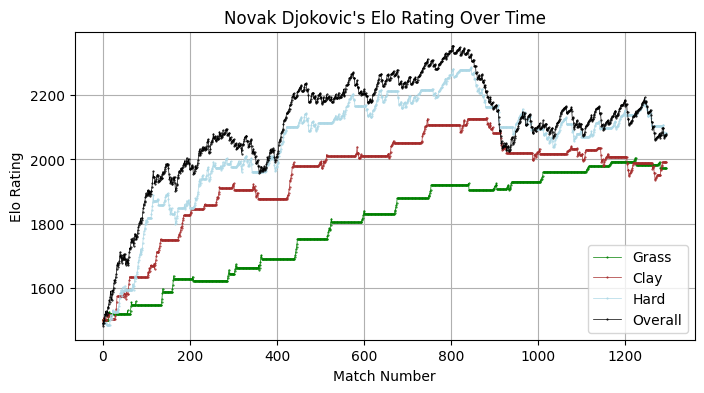

In [ ]:
plot_player_elo_graph(104925, "Novak Djokovic")

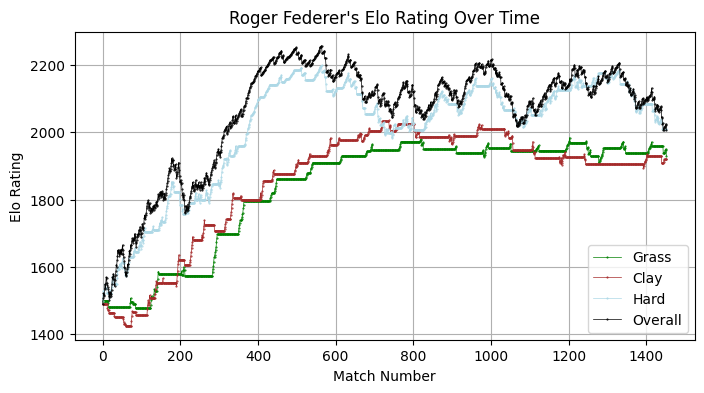

In [ ]:
plot_player_elo_graph(103819, "Roger Federer")

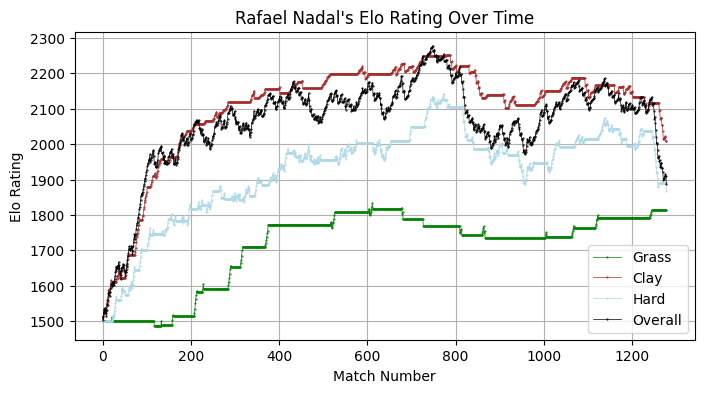

In [ ]:
plot_player_elo_graph(104745, "Rafael Nadal")

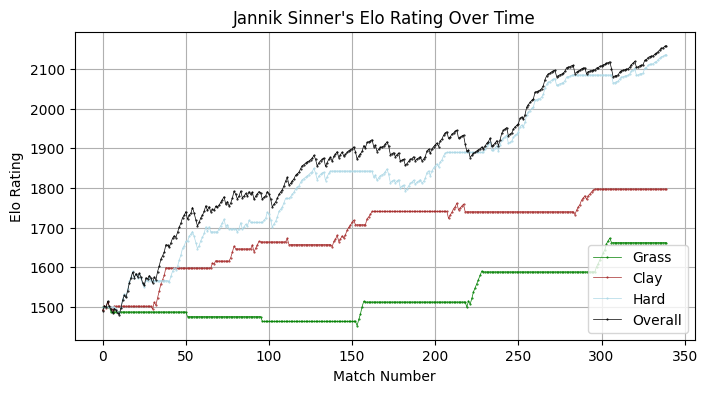

In [ ]:
plot_player_elo_graph(206173, "Jannik Sinner")

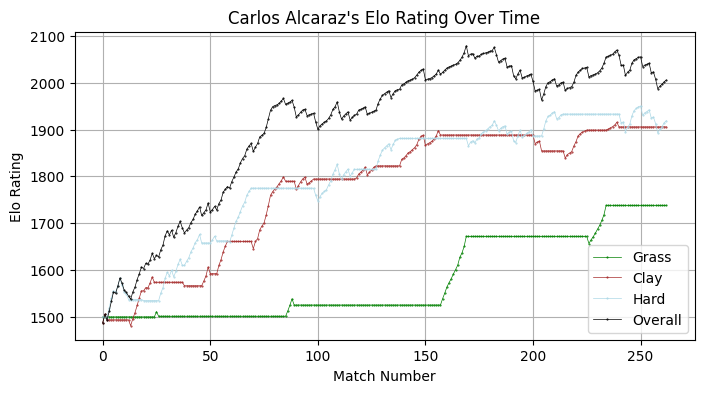

In [ ]:
plot_player_elo_graph(207989, "Carlos Alcaraz")

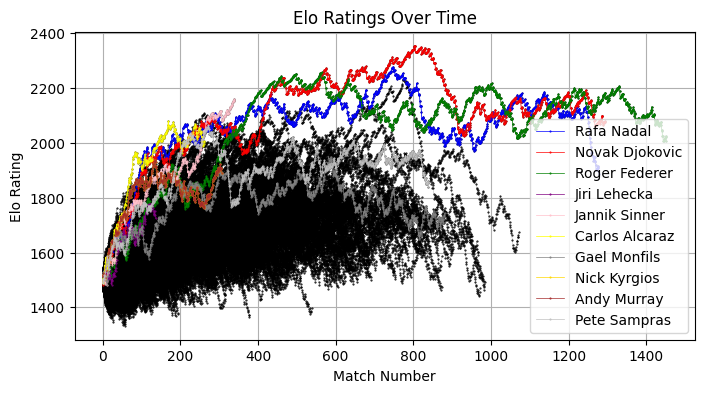

In [ ]:
from IPython.display import display
%matplotlib inline
plt.close('all')

nadal = list(all_elo[104745])
novak = list(all_elo[104925])
federer = list(all_elo[103819])
jiri = list(all_elo[208103])
jannik = list(all_elo[206173])
carlos = list(all_elo[207989])
gael = list(all_elo[104792])
nick = list(all_elo[106401])
andy = list(all_elo[104918])
pete = list(all_elo[101736])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

for player in all_elo.keys():
    plt.plot(list(all_elo[player]), marker='.', linewidth=0.1, markersize=1, linestyle='-', color='black')

plt.plot(nadal, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='blue', label="Rafa Nadal")
plt.plot(novak, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='red', label="Novak Djokovic")
plt.plot(federer, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Roger Federer")
plt.plot(jiri, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='purple', label="Jiri Lehecka")
plt.plot(jannik, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='pink', label="Jannik Sinner")
plt.plot(carlos, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='yellow', label="Carlos Alcaraz")
plt.plot(gael, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gray', label="Gael Monfils")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gold', label="Nick Kyrgios")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Andy Murray")
plt.plot(pete, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='silver', label="Pete Sampras")

plt.title("Elo Ratings Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/elo_ratings_plot.png", dpi=500)

plt.draw()
plt.show()


### Final tweaks on the dataset

#### Randomize Dataset

In [ ]:
final_data["RESULT"] = 1

In [ ]:
column_to_randomize = []

for val in list(final_data.columns):
    if "DIFF" in val:
        print(val)
        column_to_randomize.append(val)

column_to_randomize.append("RESULT")

final_data[column_to_randomize] = final_data[column_to_randomize].apply(lambda row: row * (-1) if np.random.rand() < 0.5 else row, axis=1)

ATP_POINT_DIFF
ATP_RANK_DIFF
AGE_DIFF
HEIGHT_DIFF
H2H_DIFF
H2H_SURFACE_DIFF
DIFF_N_GAMES
WIN_LAST_10_DIFF
WIN_LAST_25_DIFF
WIN_LAST_50_DIFF
P_ACE_LAST_10_DIFF
P_DF_LAST_10_DIFF
P_1ST_IN_LAST_10_DIFF
P_1ST_WON_LAST_10_DIFF
P_2ND_WON_LAST_10_DIFF
P_BP_SAVED_LAST_10_DIFF
P_ACE_LAST_20_DIFF
P_DF_LAST_20_DIFF
P_1ST_IN_LAST_20_DIFF
P_1ST_WON_LAST_20_DIFF
P_2ND_WON_LAST_20_DIFF
P_BP_SAVED_LAST_20_DIFF
P_ACE_LAST_50_DIFF
P_DF_LAST_50_DIFF
P_1ST_IN_LAST_50_DIFF
P_1ST_WON_LAST_50_DIFF
P_2ND_WON_LAST_50_DIFF
P_BP_SAVED_LAST_50_DIFF
P_ACE_LAST_100_DIFF
P_DF_LAST_100_DIFF
P_1ST_IN_LAST_100_DIFF
P_1ST_WON_LAST_100_DIFF
P_2ND_WON_LAST_100_DIFF
P_BP_SAVED_LAST_100_DIFF
P_ACE_LAST_2000_DIFF
P_DF_LAST_2000_DIFF
P_1ST_IN_LAST_2000_DIFF
P_1ST_WON_LAST_2000_DIFF
P_2ND_WON_LAST_2000_DIFF
P_BP_SAVED_LAST_2000_DIFF
ELO_DIFF
ELO_SURFACE_DIFF
ELO_GRAD_10_DIFF
ELO_GRAD_20_DIFF
ELO_GRAD_50_DIFF
ELO_GRAD_100_DIFF
ELO_GRAD_250_DIFF


## Plot Datset

In [ ]:
final_data

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
0,101142,101746,-1028.0,69.0,-5.0,-5.0,3,32,-0.0,-0.0,...,-0.000000,-0.000000,-24.000000,-24.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
1,101613,100587,257.0,-126.0,-10.3,-8.0,3,32,0.0,0.0,...,0.000000,0.000000,24.000000,24.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,101179,101601,352.0,-135.0,3.7,0.0,3,32,0.0,0.0,...,0.000000,0.000000,24.000000,24.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,101117,101332,19.0,-7.0,2.0,7.0,3,32,0.0,0.0,...,0.000000,0.000000,24.000000,24.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,101901,101735,734.0,-162.0,0.9,11.0,3,32,-0.0,-0.0,...,-0.000000,-0.000000,-24.000000,-24.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,207134,133933,-40.0,250.0,3.2,8.0,3,4,-0.0,-0.0,...,-0.000000,-0.000000,-24.000000,-24.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
95371,121411,132374,-187.0,621.0,-2.2,10.0,3,4,-0.0,-0.0,...,-40.040541,-49.500000,-13.373153,-24.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
95372,208364,209943,-21.0,124.0,-2.1,3.0,3,4,-0.0,-0.0,...,-47.714286,-70.333333,-44.002075,-44.659670,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
95373,105430,208364,434.0,-480.0,10.3,-10.0,3,4,0.0,0.0,...,-1.006241,-11.430715,4.421435,-30.912874,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# sns.pairplot(final_data, hue='RESULT')

![image info](./images/outputAllFeatures.png)

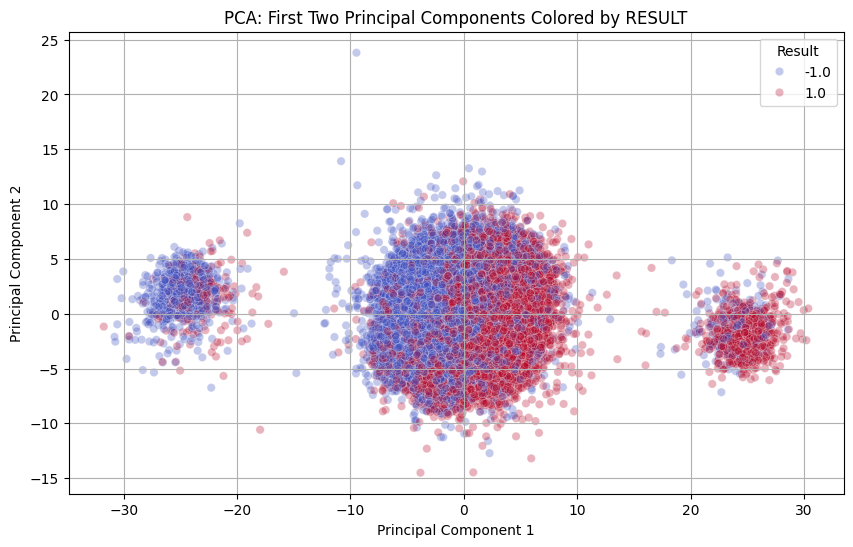

In [ ]:
# Drop the target variable ('RESULT') if it exists
features = final_data.drop(columns=['RESULT'], errors='ignore')

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA with 9 principal components
pca_9 = PCA(n_components=9)
principal_components_9 = pca_9.fit_transform(features_scaled)

# Creating a DataFrame with the first 9 principal components
pca_df_9 = pd.DataFrame(principal_components_9, columns=[f'PC{i+1}' for i in range(9)])

# Add the RESULT column back to the PCA DataFrame (if it was originally present in the dataset)
pca_df_9['RESULT'] = final_data['RESULT'].values

# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [ ]:
pca_df_9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,RESULT
0,-0.194532,0.027242,-0.339417,-0.239646,0.310321,-0.861725,0.191792,0.068082,0.276994,-1.0
1,0.043162,-0.223623,0.080187,0.162408,0.754909,-0.856119,0.474298,-0.312156,0.331524,1.0
2,0.199064,-0.145024,0.253458,0.279594,-0.177542,-0.876112,-0.249744,-0.142376,-0.154840,1.0
3,0.105786,0.095080,0.185878,-0.025361,-0.135849,-0.870950,0.015338,0.004012,-0.198915,1.0
4,0.236081,0.114369,0.263086,-0.016567,0.032781,-0.867641,0.083581,-0.181535,-0.318246,-1.0
...,...,...,...,...,...,...,...,...,...,...
95370,-0.179852,0.292775,-0.142533,-0.390107,-0.384076,-0.988402,0.066978,0.365310,-0.128420,-1.0
95371,-21.691304,1.368356,8.628954,-0.533480,0.217948,-1.212105,-0.120188,0.391465,-0.356585,-1.0
95372,-24.678988,4.211854,10.994181,0.340627,0.309013,-0.729096,-0.905680,-0.534834,-1.242755,-1.0
95373,-0.433573,1.138269,1.936923,1.932150,-0.485738,-1.088587,-1.546225,-0.943227,-1.451379,1.0


In [ ]:
# sns.pairplot(data=pca_df_9, hue="RESULT")

![image info](./images/outputPCA_Pariplot2.png)

In [ ]:
if 'ELO_DIFF' in final_data.columns:
    pca_df_9['ELO_DIFF'] = final_data['ELO_DIFF'].values

if 'DIFF_N_GAMES' in final_data.columns:
    pca_df_9['DIFF_N_GAMES'] = final_data['DIFF_N_GAMES'].values

if 'H2H_DIFF' in final_data.columns:
    pca_df_9['H2H_DIFF'] = final_data['H2H_DIFF'].values

if 'P_1ST_WON_LAST_50_DIFF' in final_data.columns:
    pca_df_9['P_1ST_WON_LAST_50_DIFF'] = final_data['P_1ST_WON_LAST_50_DIFF'].values


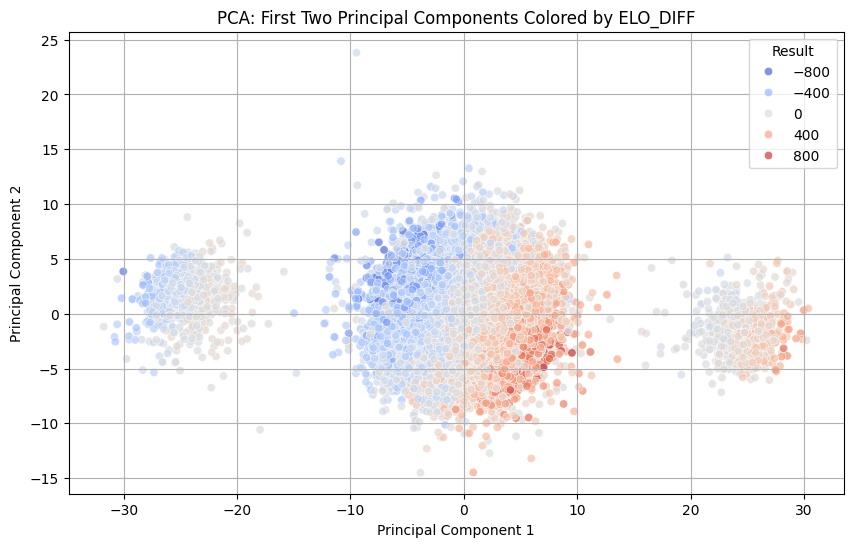

In [ ]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

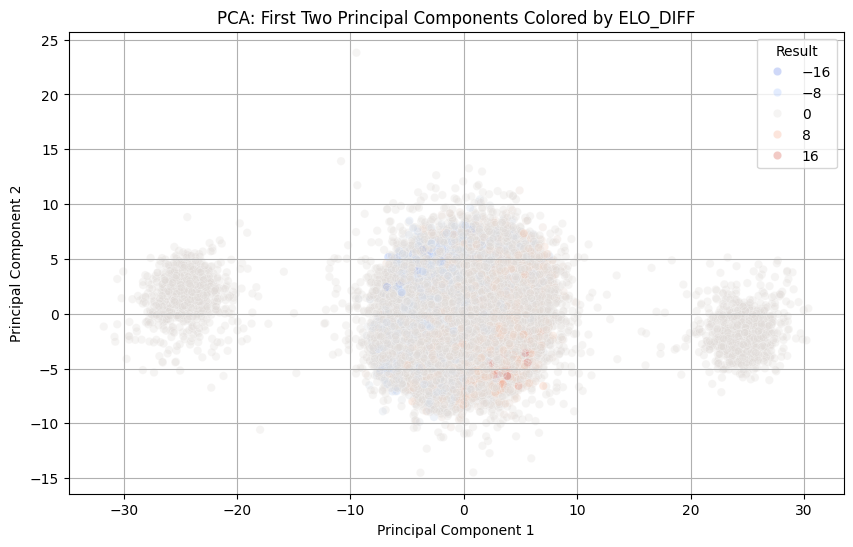

In [ ]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['H2H_DIFF'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

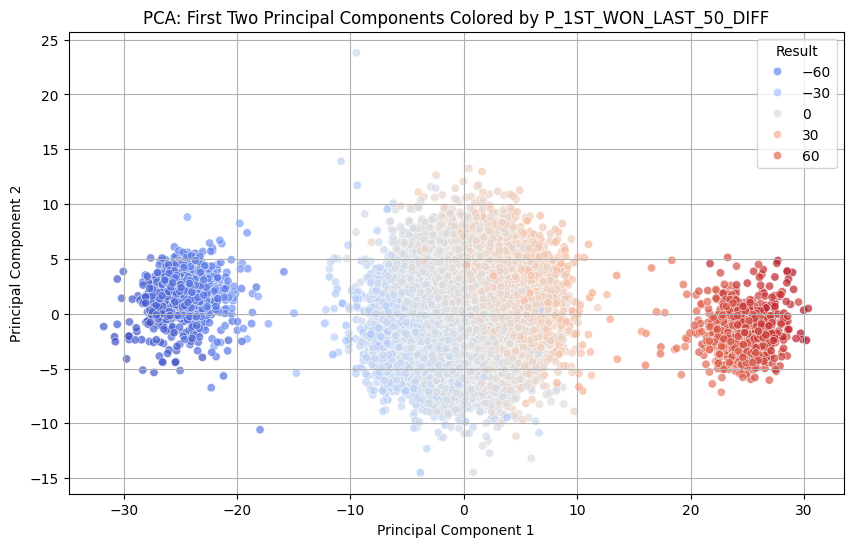

In [ ]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['P_1ST_WON_LAST_50_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by P_1ST_WON_LAST_50_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

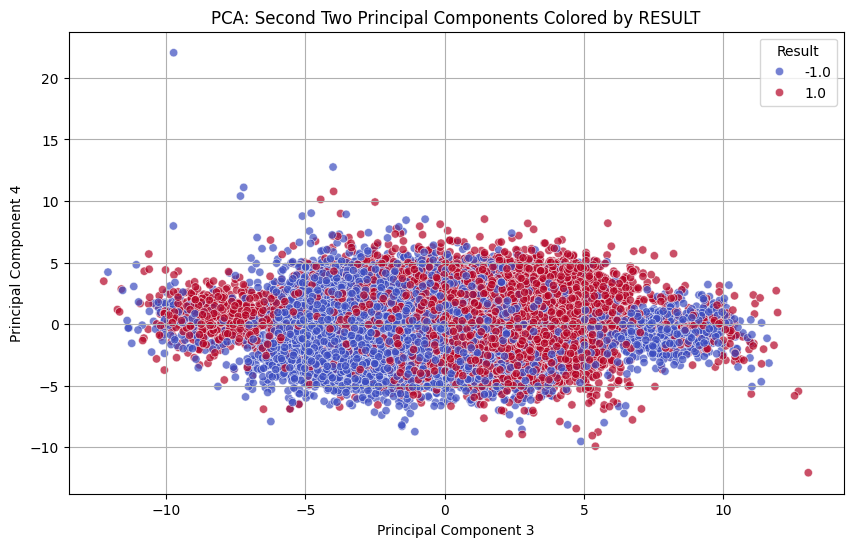

In [ ]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: Second Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


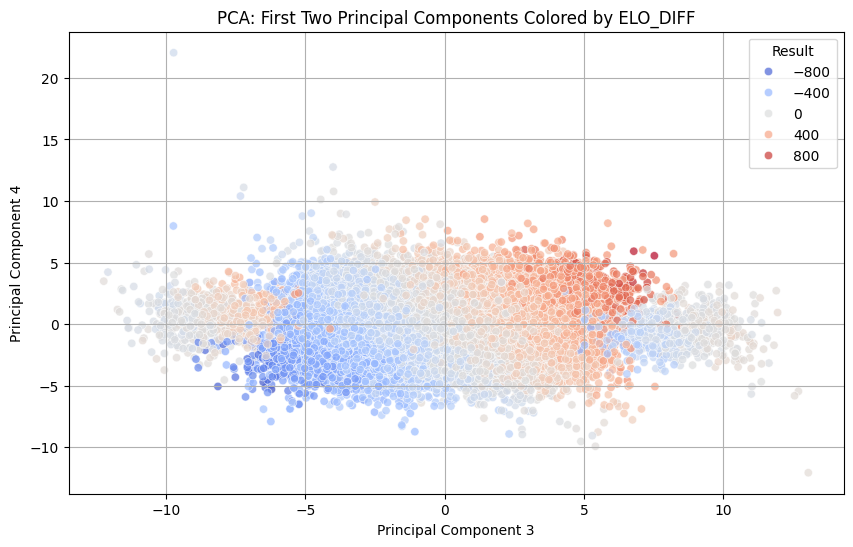

In [ ]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [ ]:
# Get PCA loadings (how much each original feature contributes to each principal component)
loadings = pd.DataFrame(pca_9.components_.T, 
                        columns=[f'PC{i+1}' for i in range(9)], 
                        index=features.columns)

# Display absolute contributions of features to PC1 & PC2
print("Feature importance in PC1 and PC2:")
print(loadings[['PC1', 'PC2', 'PC3', 'PC4']].abs().sort_values(by='PC1', ascending=False))


Feature importance in PC1 and PC2:
                                PC1       PC2       PC3       PC4
P_1ST_WON_LAST_50_DIFF     0.226667  0.081231  0.025734  0.013957
P_1ST_WON_LAST_100_DIFF    0.226467  0.081525  0.029880  0.012379
P_1ST_WON_LAST_20_DIFF     0.224786  0.080416  0.022552  0.020152
P_1ST_WON_LAST_2000_DIFF   0.224149  0.085460  0.047052  0.019898
P_1ST_WON_LAST_10_DIFF     0.219631  0.077779  0.021773  0.024494
P_2ND_WON_LAST_100_DIFF    0.216528  0.101027  0.055277  0.002584
P_2ND_WON_LAST_2000_DIFF   0.215718  0.092761  0.071073  0.005262
P_2ND_WON_LAST_50_DIFF     0.215310  0.104461  0.050362  0.008378
P_BP_SAVED_LAST_2000_DIFF  0.212450  0.010109  0.054155  0.037634
P_BP_SAVED_LAST_100_DIFF   0.212158  0.006422  0.041270  0.031871
P_2ND_WON_LAST_20_DIFF     0.208598  0.107114  0.044060  0.020095
P_BP_SAVED_LAST_50_DIFF    0.208258  0.003495  0.036518  0.035238
P_2ND_WON_LAST_10_DIFF     0.195717  0.104613  0.041084  0.027990
P_BP_SAVED_LAST_20_DIFF    0.192612  0.00

## Final Dataset

In [ ]:
final_data.iloc[80000:90000]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
80000,106432,105051,841.0,-32.0,-9.0,0.0,3,64,0.0,0.0,...,6.954831,6.444261,196.379676,196.931634,-6.000999,-3.123984,-1.229468,1.160180,0.000000,1.0
80001,103819,105453,-4170.0,10.0,-8.4,-7.0,3,64,-3.0,-3.0,...,-5.241203,-6.999375,-230.922669,-266.413618,2.598731,3.926027,1.260959,-1.479487,-0.705876,-1.0
80002,104925,100644,-1690.0,2.0,-9.9,10.0,3,64,1.0,-0.0,...,-3.820978,-3.747799,-214.221116,-317.155199,-7.272872,-6.182346,-0.090597,2.478836,2.939864,-1.0
80003,106432,103819,5085.0,-17.0,15.3,-3.0,3,64,1.0,2.0,...,4.984378,6.931676,270.614246,344.586151,-3.497060,-2.608551,-3.705298,-1.655372,-0.000000,-1.0
80004,104925,106432,4630.0,-16.0,9.5,0.0,3,64,2.0,0.0,...,3.121504,4.062351,293.841865,378.835340,0.885753,3.106526,-1.259594,-4.193783,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,105173,200670,205.0,-20.0,-10.5,3.0,3,32,1.0,1.0,...,-1.886958,3.175922,2.664414,-4.030663,4.628573,6.673456,-0.000000,-0.000000,-0.000000,-1.0
89996,111581,133430,-961.0,60.0,1.2,3.0,3,32,0.0,0.0,...,-5.653745,-8.437843,-228.252755,-223.960104,-2.261749,-5.459600,0.000000,0.000000,0.000000,1.0
89997,111456,106415,437.0,-22.0,-0.5,-8.0,3,32,3.0,1.0,...,3.088424,-4.551408,35.547257,31.073773,3.467339,-0.187827,3.834164,-0.650262,-0.000000,-1.0
89998,106218,123896,772.0,-729.0,-4.1,-5.0,3,32,0.0,0.0,...,49.776150,57.940694,147.006529,129.772377,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
# REMOVE FEATURES???

# for feature in final_data.keys()[2:]:
#     if feature not in ['WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


### Split training vs testing data

In [ ]:
data_np = final_data.to_numpy(dtype=object)[:, 2:]
np.random.shuffle(data_np)
data_np

array([[1070.0, -45.0, 2.1000000000000014, ..., 0.0, 0.0, 1.0],
       [-710.0, 18.0, -6.700000000000003, ..., 0.0, 0.0, 1.0],
       [-975.0, 40.0, 2.299999999999997, ..., 0.16809859953947753, -0.0,
        -1.0],
       ...,
       [2299.0, -1041.0, 6.400000000000002, ..., 0.0, 0.0, 1.0],
       [-458.0, 51.0, -3.5, ..., -0.0, -0.0, -1.0],
       [-873.0, 14.0, -7.199999999999999, ..., -0.5630397067719646, -0.0,
        -1.0]], dtype=object)

In [ ]:
split = 0.90
total_rows = final_data.shape[0]
value = round(split*total_rows)

data_np_train = data_np[:value,:]
data_np_test = data_np[value:,:]

In [ ]:
mapper = np.vectorize(lambda x: "Player 2 Wins" if x == -1 else "Player 1 Wins")
reverse_mapper = np.vectorize(lambda x: 0 if x == "Player 2 Wins" else 1)
x_train = data_np_train[:,:-1]
x_test = data_np_test[:,:-1]
y_pred_train = mapper(data_np_train[:,-1:])
y_pred_test = mapper(data_np_test[:,-1:])

In [ ]:
data_np_train.shape

(85838, 50)

In [ ]:
from sklearn.metrics import accuracy_score
# Note that for some of the features are switched (like ATP_RANK_DIFF, where more positive is better)
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    


ATP_POINT_DIFF: 0.6470588235294118
ATP_RANK_DIFF: 0.35294117647058826
AGE_DIFF: 0.48684072559505087
HEIGHT_DIFF: 0.5240641711229946
BEST_OF: 0.5070776973891161
DRAW_SIZE: 0.5070776973891161
H2H_DIFF: 0.5383244206773619
H2H_SURFACE_DIFF: 0.522596204257104
DIFF_N_GAMES: 0.5967285309845863
WIN_LAST_10_DIFF: 0.6156023906888959
WIN_LAST_25_DIFF: 0.6382510223340673
WIN_LAST_50_DIFF: 0.6447520184544406
P_ACE_LAST_10_DIFF: 0.5538429275453497
P_DF_LAST_10_DIFF: 0.4766698123099507
P_1ST_IN_LAST_10_DIFF: 0.5273146691831813
P_1ST_WON_LAST_10_DIFF: 0.5863479081472162
P_2ND_WON_LAST_10_DIFF: 0.5860333438188109
P_BP_SAVED_LAST_10_DIFF: 0.5509069938135682
P_ACE_LAST_20_DIFF: 0.5561497326203209
P_DF_LAST_20_DIFF: 0.4744678620111146
P_1ST_IN_LAST_20_DIFF: 0.5317185697808535
P_1ST_WON_LAST_20_DIFF: 0.5858236342665408
P_2ND_WON_LAST_20_DIFF: 0.597986788298207
P_BP_SAVED_LAST_20_DIFF: 0.5534235084408095
P_ACE_LAST_50_DIFF: 0.5551011848589703
P_DF_LAST_50_DIFF: 0.47698437663835586
P_1ST_IN_LAST_50_DIFF: 0.5

In [ ]:
final_data.keys()

Index(['WINNER_ID', 'LOSER_ID', 'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF',
       'HEIGHT_DIFF', 'BEST_OF', 'DRAW_SIZE', 'H2H_DIFF', 'H2H_SURFACE_DIFF',
       'DIFF_N_GAMES', 'WIN_LAST_10_DIFF', 'WIN_LAST_25_DIFF',
       'WIN_LAST_50_DIFF', 'P_ACE_LAST_10_DIFF', 'P_DF_LAST_10_DIFF',
       'P_1ST_IN_LAST_10_DIFF', 'P_1ST_WON_LAST_10_DIFF',
       'P_2ND_WON_LAST_10_DIFF', 'P_BP_SAVED_LAST_10_DIFF',
       'P_ACE_LAST_20_DIFF', 'P_DF_LAST_20_DIFF', 'P_1ST_IN_LAST_20_DIFF',
       'P_1ST_WON_LAST_20_DIFF', 'P_2ND_WON_LAST_20_DIFF',
       'P_BP_SAVED_LAST_20_DIFF', 'P_ACE_LAST_50_DIFF', 'P_DF_LAST_50_DIFF',
       'P_1ST_IN_LAST_50_DIFF', 'P_1ST_WON_LAST_50_DIFF',
       'P_2ND_WON_LAST_50_DIFF', 'P_BP_SAVED_LAST_50_DIFF',
       'P_ACE_LAST_100_DIFF', 'P_DF_LAST_100_DIFF', 'P_1ST_IN_LAST_100_DIFF',
       'P_1ST_WON_LAST_100_DIFF', 'P_2ND_WON_LAST_100_DIFF',
       'P_BP_SAVED_LAST_100_DIFF', 'P_ACE_LAST_2000_DIFF',
       'P_DF_LAST_2000_DIFF', 'P_1ST_IN_LAST_2000_DIFF',
       '

# Train Dataset

In [ ]:
from DecisionTree import DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

### Random Forest with Sklearn

In [ ]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(x_train, y_pred_train)

# Make predictions and test accuracy
predictions_train = forest_sklearn.predict(x_train)
predictions_test = forest_sklearn.predict(x_test)
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.9861250262121671
Test Accuracy: 0.78211177519136


In [ ]:
forest_sklearn.feature_importances_

array([0.040447  , 0.0302764 , 0.01880488, 0.01000879, 0.00150564,
       0.0054057 , 0.00577385, 0.00433726, 0.02866473, 0.01638356,
       0.02258414, 0.03921847, 0.01301698, 0.01363662, 0.01321606,
       0.01489433, 0.0159644 , 0.01425519, 0.01259267, 0.01305288,
       0.01277079, 0.01464972, 0.0176757 , 0.01408702, 0.01221176,
       0.01267859, 0.01238881, 0.01431639, 0.02007396, 0.01422556,
       0.01227489, 0.0123831 , 0.01248646, 0.01513365, 0.0211711 ,
       0.01417555, 0.0120217 , 0.01287479, 0.01263084, 0.01345245,
       0.0180728 , 0.01462424, 0.15059138, 0.13963233, 0.01556188,
       0.01530878, 0.01369117, 0.00994464, 0.00485041])

Okay, this is actually really overfitted (did not realize it was this much haha). Let's try some other parameters to see what happens

In [ ]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=20, min_samples_leaf=15, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = forest_sklearn.predict(data_np_test[:,:-1])
predictions_train = forest_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.7816934224935344
Test Accuracy: 0.7629233511586453


In [ ]:
# Instantiate a RandomForest
decision_sklearn = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5,)
decision_sklearn = decision_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = decision_sklearn.predict(data_np_test[:,:-1])
predictions_train = decision_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

Train Accuracy: 0.8105384561616068
Test Accuracy: 0.7679563804131279


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7)

# Train the model
xgb_model.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Make predictions
predictions_test = xgb_model.predict(data_np_test[:, :-1])
predictions_train = xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_train), predictions_train)))
print("Test Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test), predictions_test)))


Train Accuracy: 0.9903539225051842
Test Accuracy: 0.8311838104225647


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
predictions_test = best_xgb_model.predict(data_np_test[:, :-1])
predictions_train = best_xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy:", accuracy_score(reverse_mapper(y_pred_train), predictions_train))
print("Test Accuracy:", accuracy_score(reverse_mapper(y_pred_test), predictions_test))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.763 total time=   2.0s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.769 total time=   2.1s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.768 total time=   2.0s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.766 total time=   2.2s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.6;, score=0.766 total time=   2.0s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=0.771 total time=   2.0s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8;, score=0.764 total time=   2.1s
[CV 3

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  27.5s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  27.7s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.8;, score=0.791 total time=  28.4s
[CV 1/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.796 total time=  29.6s
[CV 2/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.790 total time=  29.7s
[CV 3/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.791 total time=  29.1s
[CV 4/5] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=1.0;, score=0.789 total time=  30.7s
[CV 5/5] END colsample_bytree=0.6, learning_rate=0.01, max_dep

In [ ]:
data_np_train

In [ ]:
xgb_model.feature_importances_

In [ ]:
reverse_mapper(y_pred_train)

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(data_np_train[:, :-1])
X_test = scaler.transform(data_np_test[:, :-1])

# Define the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, reverse_mapper(y_pred_train), epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
train_loss, train_acc = model.evaluate(X_train, reverse_mapper(y_pred_train), verbose=0)
test_loss, test_acc = model.evaluate(X_test, reverse_mapper(y_pred_test), verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/50


/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2146/2146 ━━━━━━━━━━━━━━━━━━━━ 2s 653us/step - accuracy: 0.7312 - loss: 0.5349 - val_accuracy: 0.7666 - val_loss: 0.4859
Epoch 2/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.7844 - loss: 0.4582 - val_accuracy: 0.7884 - val_loss: 0.4483
Epoch 3/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8037 - loss: 0.4311 - val_accuracy: 0.7963 - val_loss: 0.4383
Epoch 4/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.8097 - loss: 0.4193 - val_accuracy: 0.8043 - val_loss: 0.4275
Epoch 5/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8122 - loss: 0.4114 - val_accuracy: 0.8046 - val_loss: 0.4324
Epoch 6/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8211 - loss: 0.4024 - val_accuracy: 0.8085 - val_loss: 0.4251
Epoch 7/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8220 - loss: 0.3986 - val_accuracy: 0.8141 - val_loss: 0.4136
Epoch 8/50
2146/2146 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.8227 - loss: 0.39

In [ ]:
!pip3 install tensorflow

In [ ]:
data_np_train[:,:-1]

Trying GridSearchCV to see what happens

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,
#     verbose=4
# )
# grid_search.fit(data_np_train[:,:-1], y_pred_train.squeeze())

# print("Best params:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)


### Test with ELO rating and ATP points prediction

In [ ]:
total_features = final_data.keys()[2:]
total_features

In [ ]:
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    

In [ ]:
elo_pred = []

for row in data_np_test[:,-3:-2]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
data_np_test.shape[1]

In [ ]:
# Let's see the accuracy of the ELO rating, and how many times there is an upset
elo_pred = []

for row in data_np_test[:,-3:-2]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)
    

In [ ]:
# Let's see the accuracy of the surface ELO rating
elo_pred = []

for row in data_np_test[:,-2:-1]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
# Let's see the accuracy of the ATP points
elo_pred = []

for row in data_np_test[:,:1]:
    if row[0] > 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)

In [ ]:
# Let's see the accuracy of the ATP rank
elo_pred = []

for row in data_np_test[:,1:2]:
    if row[0] < 0:
        elo_pred.append("Player 1 Wins")
    else:
        elo_pred.append("Player 2 Wins")

accuracy_score(y_pred_test, elo_pred)